In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D, Dropout, Reshape, Conv2DTranspose
from tensorflow.keras.models import Sequential
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import os
import PIL
import time
from IPython import display

In [2]:
root_path = r"C:\Users\Madhur2001\Downloads\game\image\Dataset\God of War"
root_path = pathlib.Path(root_path)


In [3]:
batch_size = 32
   
data = keras.preprocessing.image_dataset_from_directory(
       directory=root_path,
       label_mode=None,
       batch_size=batch_size,
       image_size=(64, 64))

Found 1000 files.


In [4]:
data

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>

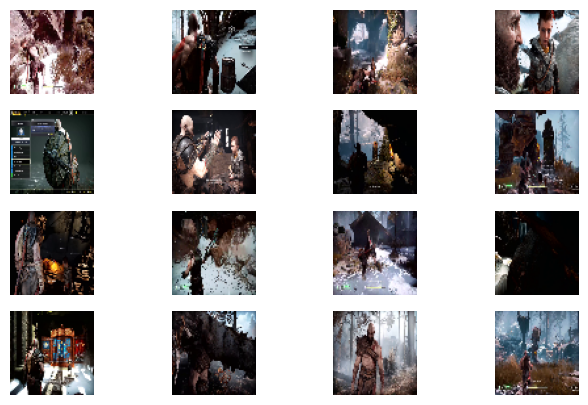

In [5]:
plt.figure(figsize=(8,5))
for images in data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [6]:
data = data.map(lambda d : ((d-127.5)/127.5))
data

<_MapDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>

In [11]:

from keras.layers import Conv2D, BatchNormalization, Dropout, Dense, LeakyReLU, Flatten
from keras.models import Sequential

def Discriminator():
    discriminator = Sequential()
    discriminator.add(Conv2D(filters=64, kernel_size=3, strides=(2,2), padding="same", input_shape=(64,64,3)))
    discriminator.add(LeakyReLU())
    discriminator.add(BatchNormalization())
    discriminator.add(Dropout(0.2))

    discriminator.add(Conv2D(filters=128, kernel_size=3, strides=(2,2), padding="same"))
    discriminator.add(LeakyReLU())
    discriminator.add(BatchNormalization())
    discriminator.add(Dropout(0.2))

    discriminator.add(Conv2D(filters=256, kernel_size=3, strides=(2,2), padding="same"))
    discriminator.add(LeakyReLU())
    discriminator.add(BatchNormalization())
    discriminator.add(Dropout(0.2))

    discriminator.add(Flatten())
    discriminator.add(Dropout(0.2))
    discriminator.add(Dense(units=1, activation="sigmoid"))

    return discriminator

D_model = Discriminator()
D_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        16,385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,993 (1.48 MB)

 Trainable params: 388,097 (1.48 MB)

 Non-trainable params: 896 (3.50 KB)

In [12]:
D_optm = Adam(1e-4)

In [13]:
latent_dim = 100

In [15]:

from keras.layers import Dense, Reshape, Conv2DTranspose, BatchNormalization, Activation
from keras.models import Sequential

def Generator():
    latent_dim = 100

    generator = Sequential()

    generator.add(Dense(units=4*4*256, input_shape=[latent_dim], use_bias=False))
    generator.add(Reshape((4,4,256)))
    generator.add(BatchNormalization())

    generator.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same"))
    generator.add(BatchNormalization())
    generator.add(Activation("relu"))

    generator.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same"))
    generator.add(BatchNormalization())
    generator.add(Activation("relu"))

    generator.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same"))
    generator.add(BatchNormalization())
    generator.add(Activation("relu"))

    generator.add(Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="tanh"))

    return generator

G_model = Generator()
G_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4096)           │       409,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 8, 8, 128)      │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 16, 16, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 3)      │         3,459 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,005,827 (3.84 MB)

 Trainable params: 1,004,547 (3.83 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [16]:

G_optm = Adam(1e-4)

In [17]:
random_noise = tf.random.normal([1,latent_dim])

In [18]:
G_output_on_random_noise = G_model(random_noise, training=False)

(-0.5, 63.5, 63.5, -0.5)

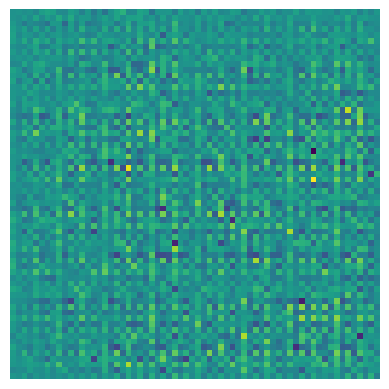

In [19]:
plt.imshow(G_output_on_random_noise[0, :, :, 0])
plt.axis("off")

In [20]:
D_output_on_random_noise = D_model(G_output_on_random_noise)
print(D_output_on_random_noise)

tf.Tensor([[0.49969992]], shape=(1, 1), dtype=float32)


In [21]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))
        # Decode them to fake images
        generated_images = self.generator(seed)
        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)
        # Assemble labels discriminating real from fake images
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))
        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Sample random points in the latent space
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(seed))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [22]:
loss_fn = tf.keras.losses.BinaryCrossentropy()

In [23]:
model = GAN(discriminator=D_model, generator=G_model, latent_dim=latent_dim)

In [24]:
model.compile(d_optimizer=D_optm, g_optimizer=G_optm, loss_fn=loss_fn)

In [25]:

epochs = 35

history = model.fit(data, epochs=epochs)

Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - d_loss: 0.5709 - g_loss: 0.6984
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - d_loss: 0.2283 - g_loss: 1.5104
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - d_loss: 0.0941 - g_loss: 3.1885
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - d_loss: -0.0592 - g_loss: 14.5566
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - d_loss: -0.1062 - g_loss: 19.3445
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - d_loss: -0.0247 - g_loss: 15.0705
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - d_loss: -0.1323 - g_loss: 29.4251
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - d_loss: -0.8291 - g_loss: 96.6976
Epoch 9/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - d_loss: 0.0466 - g_loss: 35.8546
Epoch 10/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 357ms/step - d_loss: -0.7109 - g_loss: 98.4086
Epoch 11/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 359ms/step - d_loss: -2.8619 - g_loss: 309.0628
Epoch 12/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 

In [26]:
noise = tf.random.normal([32, 100])
 
generated_images = G_model(noise, training=False)

In [27]:
generated_images1 = (generated_images+127.5)*127.5

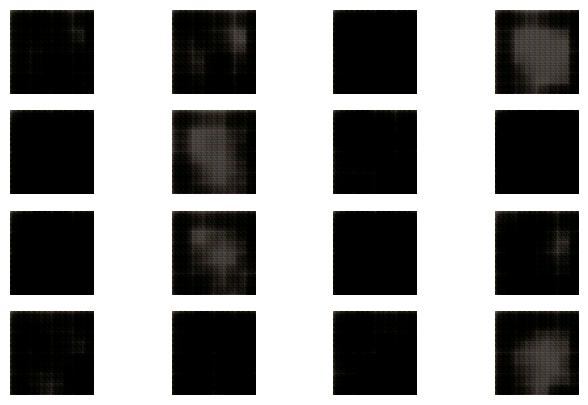

In [28]:
plt.figure(figsize=(8, 5))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(generated_images1[i].numpy().astype("uint8"))
    plt.axis('off')

plt.show()